# Introduction

This is a jupyter notebook adapting the content of the lab 3.6.2 from the book Introduction to Statistical Learning to python

References:

https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://rpubs.com/ACC839303568/islrchapter3


## 3.6.2 Simple Linear Regression 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence



In [58]:
cols = np.arange(1, 15)
boston = pd.read_csv('Boston.csv', usecols = cols)
plt.style.use('seaborn')

In [59]:
display(boston.head())
display(boston.info())


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

In [60]:
results = smf.ols('medv ~ lstat', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 02 May 2021   Prob (F-statistic):           5.08e-88
Time:                        02:43:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [61]:
# Example: getting the Beta coefficients from model
results.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [62]:
# Getting a confidence interval of 2.5% and 97.5% of the coefficients
results.conf_int()


,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [63]:
# Predicting values (outside or inside sample limits)

""" 
In order to get a confidence interval for predictions, one must use the method get_prediction passing a dict with
the keys named the same as the predictor columns, and with values equal the values one want to predict.

Afterwards, one should use the method summary_frame to get the prediction informations, like predicted values and upper and
lower bounds.

Notice that the summary provides both information on the confidence interval of the prediction and the prediction interval.
(As they are defined by Hastie et.al, 2013.)

"""


pred_values = np.array([40,42,44])
predictions = results.get_prediction(exog = dict(lstat = pred_values))
display(predictions.summary_frame(alpha = 0.05))
y_out = predictions.predicted_mean



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-3.448133,1.094689,-5.598850,-1.297417,-15.848067,8.951800
1,-5.348232,1.169811,-7.646539,-3.049925,-17.774614,7.078150
2,-7.248331,1.245220,-9.694793,-4.801869,-19.702966,5.206305


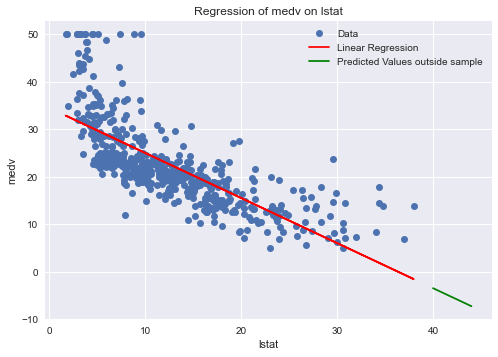

In [64]:
# Creating model for fitting. x = predictor col concatenated with the constant
x = boston.lstat
x = sm.add_constant(x)

# From the linear regression model, the vector containing the fitted values will be the dot product of the predictors (x) 
# with the vector of the betas (coefficients)
y_fit = np.dot(x, results.params)

# But that is not necessary, since we can get the prediction values within the sample from results.predict()
y_pred = results.predict()

# Plotting both the scatter plot of the.
fig, ax = plt.subplots()
ax.plot(boston.lstat, boston.medv, 'o', label = "Data") 
ax.plot(boston.lstat, y_pred, 'r-', label = "Linear Regression") #inside of sample prediction
ax.plot(pred_values, y_out, 'g-', label = "Predicted Values outside sample") # out of sample prediction
ax.legend(loc = "best")
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Regression of medv on lstat')

plt.show()

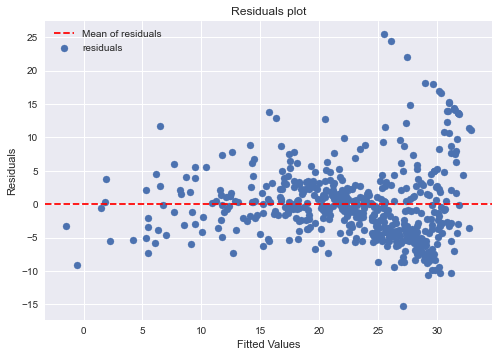

1.521944625662432e-13


In [74]:
# Fitted values vs Residuals plot
residuals = results.resid

plt.scatter(y_pred, residuals, label = 'residuals')
plt.axhline(y = np.mean(residuals), color = 'red', linestyle = '--', label = 'Mean of residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.legend(loc = 'best')
plt.show()

print(np.mean(results.resid))

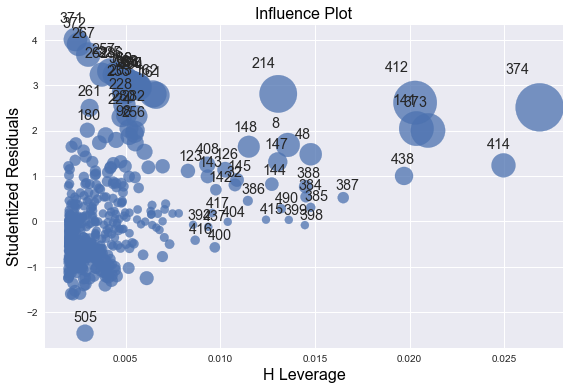

In [66]:
# Leverage and studentized residuals
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad= 1.0)

## 3.6.3 Multiple Linear Regression

In [67]:
# Regression of medv on lstat and age
results = smf.ols('medv ~ lstat + age', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 02 May 2021   Prob (F-statistic):           2.98e-88
Time:                        02:44:07   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [68]:
# Regression of medv on all of the parameters
#results = smf.ols('medv ~ .', data = boston).fit()  <- This works in R, but not in python
#print(results.summary())

In [69]:
# variance inflation factors <- copied from the github resource and adjusted with Dataframe.to_numpy
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# don't forget to add constant if the ols model includes intercept
boston_exog = sm.add_constant(boston.drop('medv', axis=1))

# too fancy for printing results?
for i, col in enumerate(boston_exog.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col, ':', "{0:.2f}".format(vif(boston_exog.to_numpy(), i)))
    else:
        print(col, '\t:', "{0:.2f}".format(vif(boston_exog.to_numpy(), i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


In [70]:
# Interaction terms
results = smf.ols('medv ~ lstat*age', data = boston).fit() # Shorthand for lstat + age + lstat x age
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 02 May 2021   Prob (F-statistic):           4.86e-88
Time:                        02:44:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [71]:
# Non-linear transformations of the predictors
results = smf.ols('medv ~ lstat + np.power(lstat,2)', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.56e-112
Time:                        02:44:09   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

In [72]:
# anova of the two models <- copied from the github resource
ols_smf = smf.ols(formula='medv ~ lstat', data=boston).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

sm.stats.anova_lm(ols_smf, ols_smf2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

<AxesSubplot:xlabel='lstat', ylabel='medv'>

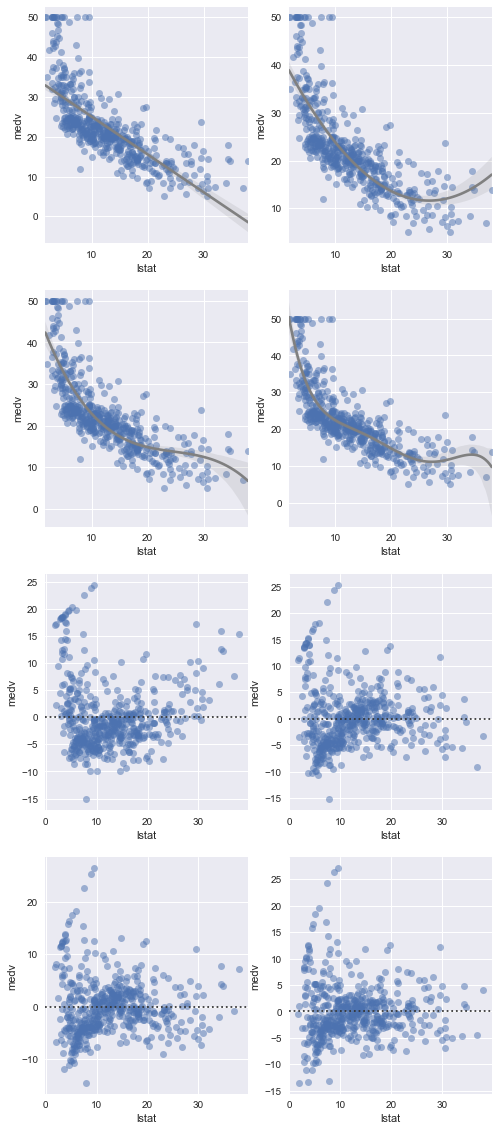

In [73]:
f, axes = plt.subplots(4, 2, sharex=False, sharey=False)
f.set_figheight(20)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[2, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[2, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[3, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})
sns.residplot('lstat', 'medv', data=boston, ax=axes[3, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': 0.5})

In [75]:
# Regression for log transformation
results = smf.ols(formula='medv ~ np.log(rm)', data=boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 02 May 2021   Prob (F-statistic):           1.22e-64
Time:                        02:46:23   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

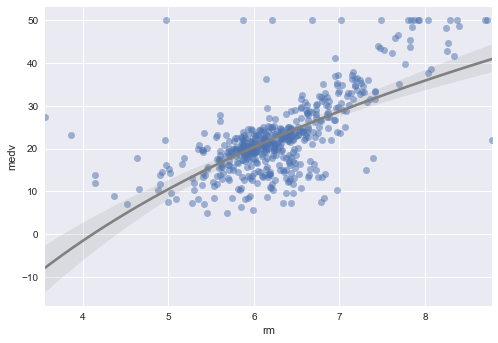

In [77]:
sns.regplot('rm', 
            'medv', 
            data=boston, 
            logx=True, 
            line_kws={'color': 'gray'}, 
            scatter_kws={'alpha': 0.5});

## 3.6.6 Qualitative predictors

In [80]:
carseats = pd.read_csv('Carseats.csv', index_col = 0)

In [81]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [83]:
# Book actually regresses sales on everything, but i was too lazy to do that. Instead, i just tested using the 
# more verbose notation of interaction between regressors
results = smf.ols('Sales ~ Income + Advertising + Income:Advertising + Price + Age + Price:Age + ShelveLoc', data = carseats).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 02 May 2021   Prob (F-statistic):          4.63e-100
Time:                        02:59:30   Log-Likelihood:                -735.02
No. Observations:                 400   AIC:                             1488.
Df Residuals:                     391   BIC:                             1524.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              14.8916    